In [1]:
#Uploading PDF documents 
#I have only trained it on SI pdf
pdf_path_SI = "SI Chronicles 23-24 Sem I1.pdf"
pdf_path_Placement = "Placement Chronicles 2023-24.pdf"

In [4]:
import torch

# Check if CUDA is available
torch.cuda.is_available()

True

In [2]:
import fitz 
#fitz is actually important and is used for opening and reading pdf 
#tqdm is just used for adding time status bar 
from  tqdm.auto import tqdm

#format function takes the text(string) and replaces /n with spaces 
def format(text: str) ->str:
    cleaned_text = text .replace ("\n"," ").strip()
    return cleaned_text

#takes into the text of a single page and then converts it into a list of dictionaires which contains 
#important parmentres like page number,page_word_count,all the text etc .
def pdf_reader(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_info=[]
    for page_number,page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = format(text=text)
        pages_info.append({"page_number": page_number,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len (text.split(". ")),
                                "page_token" : len(text)/4,
                                "text" :text})
    return pages_info
pages_info_SI= pdf_reader(pdf_path=pdf_path_SI)
pages_info_P=pdf_reader(pdf_path=pdf_path_Placement)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [3]:
import random
random.sample(pages_info_SI,k = 3)
#just to check if it working proerly

[{'page_number': 70,
  'page_char_count': 1097,
  'page_word_count': 200,
  'page_sentence_count_raw': 8,
  'page_token': 274.25,
  'text': 'Google 75 Relevant Courses and Certification ;3 CS F211 - Data Structures and Algorithm$ \x1f3 CS F212 - Database Systems2 \x1c3 CS F213 - Object-Oriented Programming Personal Experiences Sources of preparation -   I wanted to be as thorough with the A-Z of DSA, both from an academic and  a problem-solving point of view. Thus, I paid particular attention to the  course material taught. Besides that, I practiced problem-solving via  Leetcode and InterviewBit.  I also participated in competitive coding contests held over Codeforces  and Codechef.  Words of Advice -   This is naturally one of the most sought after SI offers, so the competition is  certainly high and the process, on an average, is harder than many others.  The way to stay ahead of the curve is to be consistent in your preparation  and to start as early as possible. This consistency is

In [4]:
random.sample(pages_info_P,k = 3)
#just to check if the pages and data is being published correctly 

[{'page_number': 58,
  'page_char_count': 889,
  'page_word_count': 160,
  'page_sentence_count_raw': 6,
  'page_token': 222.25,
  'text': 'IMC Trading 60 Introduction Interviewee - Tanveer Singh (2020A7PS0084P) Job Role - Software Engineer Number of offers made - 1 Selection Process Branches open to - CSE Single degree & Dual-degree  CG Cutoff - 8+ Recruitment process -  Round 1 - Online Assessment  After resume shortlisting, there was an online assessment test comprising 2  problems (medium to high level) based on Data Structures and Algorithms. Round 2 - Interview I  Before round 1, we were told to choose between one of the two languages -  C++ or Java. Further rounds, we were tested on our chosen language.  Round 2 extensively tested my theoretical knowledge of C++ (the language  I chose and was comfortable to proceed with).   Round 3 - Interview II  Round 3 was a standard HR interview. The interviewer was interested in my  motivation to join the company and discussed some of my ho

In [5]:
#all these tables are made to just get info and to check if it is working properly
import pandas as pd 
df = pd.DataFrame(pages_info_SI)
df.head()
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token
count,117.00,117.00,117.00,117.00,117.00
mean,58.00,1096.37,196.88,7.38,274.09
std,33.92,293.86,54.67,2.92,73.46
min,0.00,95.00,15.00,1.00,23.75
25%,29.00,973.00,174.00,6.00,243.25
50%,58.00,1105.00,200.00,8.00,276.25
75%,87.00,1286.00,227.00,9.00,321.50
max,116.00,1888.00,348.00,16.00,472.00


In [6]:
from spacy.lang.en import English 

nlp = English()


nlp.add_pipe("sentencizer")
#used to split the paragraph into individual senteneces 
#we want to break the text of the whole page to broken into smaller paragraphs


In [7]:
for item in tqdm(pages_info_SI):
    item["sentences"] = list(nlp(item["text"]).sents)
    
    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    
    # Count the sentences 
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/117 [00:00<?, ?it/s]

In [8]:
random.sample(pages_info_SI, k=1)

[{'page_number': 60,
  'page_char_count': 1111,
  'page_word_count': 200,
  'page_sentence_count_raw': 9,
  'page_token': 277.75,
  'text': 'DE Shaw India 65 Round 3 - Technical Interview 2  This just had one fairly tricky DSA question, based on dynamic  programming. It was that given a string, how would I partition it into k  substrings such that each substring is a palindrome.  Expected complexity:  O(N*N).  Round 4 - HR Interview  This felt more like a conversation than an interview, and we just discussed  my interest, motivation, and past experiences. Relevant Courses and Certification \x83{ CS F211 - Data Structures and Algorithml g{ CS F212 - Database Systemsz d{ CS F213 - Object-Oriented Programming Personal Experiences Sources of preparation -   I just used Leetcode mostly for competitive coding practice.  Words of Advice -   Getting a headstart and staying consistent with your preparation in  competitive coding will certainly pay off. Definitely try to develop your  problem-so

In [9]:
df = pd.DataFrame(pages_info_SI)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token,page_sentence_count_spacy
count,117.00,117.00,117.00,117.00,117.00,117.00
mean,58.00,1096.37,196.88,7.38,274.09,7.64
std,33.92,293.86,54.67,2.92,73.46,2.96
min,0.00,95.00,15.00,1.00,23.75,1.00
25%,29.00,973.00,174.00,6.00,243.25,6.00
50%,58.00,1105.00,200.00,8.00,276.25,8.00
75%,87.00,1286.00,227.00,9.00,321.50,9.00
max,116.00,1888.00,348.00,16.00,472.00,16.00


In [10]:
# Define split size to turn groups of sentences into smaller paragraph 
num_sentence_chunk_size = 8


#basically breaks down the input_list into maxmimum lots of slice size parts 
#like a list of 28 sentences will be broken down into 8,8,8,4
def split_list(input_list, slice_size):
  
  result = []
  for i in range(0, len(input_list), slice_size):
    result.append(input_list[i:i+slice_size])
  return result    

# Loop through pages and texts and split sentences into chunks
for item in tqdm(pages_info_SI):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/117 [00:00<?, ?it/s]

In [11]:
random.sample(pages_info_SI, k=1)
#as you can see they in a chunk there are no joining so we have to do more formatting 

[{'page_number': 1,
  'page_char_count': 1394,
  'page_word_count': 246,
  'page_sentence_count_raw': 9,
  'page_token': 348.5,
  'text': 'DMI Finance 06 Introduction Interviewee - Arvin Datta (2021A7PS0672P) Job Role - Analytics Intern Number of offers made - 3 (and 2 more for Data Science) Selection Process Branches open to - All branches, both single and dual degree, except A5 CG Cutoff - 6+ Recruitment process -  Round 1 - Online Assessment  This round was fairly simple and straightforward. Most questions asked  aimed at testing us on our logical reasoning abilities and quantitative  aptitude. There were a few English proficiency-testing questions as well, if I  remember correctly Round 2 - Technical Interview   After introductions, I was actually given two consulting-type case  questions. The first was a guesstimate and the second was a profitability  question. These are quite simple in level and resemble the kind asked in  preliminary interview rounds for the different consulting

In [12]:
df = pd.DataFrame(pages_info_SI)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token,page_sentence_count_spacy,num_chunks
count,117.00,117.00,117.00,117.00,117.00,117.00,117.00
mean,58.00,1096.37,196.88,7.38,274.09,7.64,1.38
std,33.92,293.86,54.67,2.92,73.46,2.96,0.49
min,0.00,95.00,15.00,1.00,23.75,1.00,1.00
25%,29.00,973.00,174.00,6.00,243.25,6.00,1.00
50%,58.00,1105.00,200.00,8.00,276.25,8.00,1.00
75%,87.00,1286.00,227.00,9.00,321.50,9.00,2.00
max,116.00,1888.00,348.00,16.00,472.00,16.00,2.00


In [13]:

import re

# Split each chunk into its own item
#creating a new list of dictionary which is like the pages_info thing 
#pages_and_chunks contains al the chunks of the pdf 
pages_and_chunks = []
for item in tqdm(pages_info_SI):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        # Join the sentences together into a paragraph-like structure, aka a chunk (so they are a single string)
        
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) # ".A" -> ". A" for any full-stop/capital letter combo 
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get stats about the chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 characters
        
        pages_and_chunks.append(chunk_dict)

# How many chunks do we have?
len(pages_and_chunks)

import re

# Split each chunk into its own item
#creating a new list of dictionary which is like the pages_info thing 
#pages_and_chunks contains al the chunks of the pdf 
pages_and_chunks = []
for item in tqdm(pages_info_SI):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        # Join the sentences together into a paragraph-like structure, aka a chunk (so they are a single string)
        
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) # ".A" -> ". A" for any full-stop/capital letter combo 
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get stats about the chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 characters
        
        pages_and_chunks.append(chunk_dict)

# How many chunks do we have?
len(pages_and_chunks)

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

161

In [14]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 56,
  'sentence_chunk': 'Capital One 61 Round 2 - Technical Interview Round 2 just involved grilling based on our Round 1 solutions. I’d recommend saving your code in VS Code/any IDE, and in a new folder, and to keep it ready. My interviewer was pretty helpful, and gave me constant hints and ideas on how to make it work better. One tip I’d give is to keep talking / engaging with him. Even if your approach isn’t the best, just let him know what you’re thinking about, as that may help him direct you in the right direction. I optimized my first code from O(n^4) to O(n^2) and my second one from O(n^2) to O(n) (if I remember correctly). Round 3 - HR Interview I was just questioned on the basis of my projects and clubs, as well as some more generic questions, but none related to Capital One. I’d still recommend going through the Capital One website and PPT thoroughly beforehand.',
  'chunk_char_count': 860,
  'chunk_word_count': 159,
  'chunk_token_count': 215.0}]

In [15]:
# Get stats about our chunks
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,161.00,161.00,161.00,161.00
mean,59.53,786.32,132.93,196.58
std,34.09,374.85,64.62,93.71
min,0.00,32.00,2.00,8.00
25%,30.00,405.00,63.00,101.25
50%,60.00,922.00,157.00,230.50
75%,89.00,1069.00,182.00,267.25
max,116.00,1380.00,240.00,345.00


In [16]:
# Show random chunks with under 30 tokens in length
#we want to remove the sentances with token size less than 30 to improve the  quality of data 
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 23.75 | Text: Core - Mechanical and Chemical 19 Present and Past Recruiters JSW Group 24 HUL 22 ExxonMobil 20
Chunk token count: 25.5 | Text: Electronics 35 Microsoft 36 Texas Instruments 42 Qualcomm 40 Nvidia 38 Present and Previous Recruiters
Chunk token count: 23.0 | Text: So long as you are able to justify whatever you have mentioned, there should be no problems.
Chunk token count: 13.25 | Text: Most questions asked were quite conceptual in nature.
Chunk token count: 20.25 | Text: But you need to know either Java or C++ very well to make it through the process.


In [17]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]
#Now we have chunks of text so we ghave to embedd them 

[{'page_number': 0,
  'sentence_chunk': 'Analytics 05 DMI Finance 06 HDFC Bank 08 InfoEdge 10 What is Data Analytics?The collection, organisation, and analysis of data in order to make informed business decisions. Check out some training resources provided by the Placement Unit to get started on your preparation for these roles -m WV Placement Training Module for Analytics and Machine Learning by the Career Development Committee, Placement Unit - click hereV sV Basics of Data Visualisation and Machine Learning by the Career Development Committee, Placement Unit - click here. Resources Present and Previous Recruiters',
  'chunk_char_count': 582,
  'chunk_word_count': 89,
  'chunk_token_count': 145.5},
 {'page_number': 1,
  'sentence_chunk': 'DMI Finance 06 Introduction Interviewee - Arvin Datta (2021A7PS0672P) Job Role - Analytics Intern Number of offers made - 3 (and 2 more for Data Science) Selection Process Branches open to - All branches, both single and dual degree, except A5 CG Cu

In [18]:
#Now we have the chunks so we will embedd the data 
#embedding basically makes every word into a array of many elements which can be further used for vector search 

from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device="cuda")


C:\Users\achau\RAG\simple-local-rag\venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\achau\RAG\simple-local-rag\venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [19]:
%%time
#using cuda ,I had tried using cpu but it a lot more time so set up cuda 
embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/150 [00:00<?, ?it/s]

CPU times: total: 22.4 s
Wall time: 4.03 s


In [51]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[100]

CPU times: total: 0 ns
Wall time: 15 ms


'Procter & Gamble 87 Relevant Courses and Certification While no course is relevant in particular, a revision of the core concepts of the 2nd year CS CDCs would certainly be useful. Personal Experiences Sources of preparation -  I used YouTube to grasp the basics of DSA, DBS, OOP and DiSCo. I don’t particularly think I required a lot of extra preparation for this role. However, I did expect HR questions and framed answers for them beforehand, after consulting with seniors who had previously received SI offers from P&G, regardless of whether it was for the IT role or for the SCM role. Words of Advice -  This is a very spontaneous recruitment process, so it would serve you well to not overthink at any step. Be sure to show the recruiters your dedication and your personality at every step, as they too are looking for all-rounders and future leaders via this programme. Also, be very thorough with your resume and what is mentioned in it, especially because that is what will determine the pr

In [21]:
len(text_chunks)


150

In [22]:
%%time

# Embedding all the texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, 
                                               convert_to_tensor=True)
text_chunk_embeddings             

CPU times: total: 5.92 s
Wall time: 2.03 s


tensor([[-0.0183,  0.0040, -0.0559,  ...,  0.0331, -0.0126, -0.0047],
        [-0.0013, -0.0426, -0.0512,  ...,  0.0021, -0.0539, -0.0153],
        [-0.0275,  0.0193, -0.0499,  ...,  0.0124,  0.0283, -0.0068],
        ...,
        [-0.0091, -0.0046, -0.0350,  ..., -0.0229,  0.0627, -0.0054],
        [ 0.0411,  0.0078, -0.0431,  ...,  0.0198, -0.0247, -0.0048],
        [ 0.0121,  0.0357, -0.0232,  ..., -0.0242,  0.0316, -0.0281]],
       device='cuda:0')

In [52]:
pages_and_chunks_over_min_token_len[100]
# To see how does a text chunk look like in the embedding array 

{'page_number': 82,
 'sentence_chunk': 'Procter & Gamble 87 Relevant Courses and Certification While no course is relevant in particular, a revision of the core concepts of the 2nd year CS CDCs would certainly be useful. Personal Experiences Sources of preparation -  I used YouTube to grasp the basics of DSA, DBS, OOP and DiSCo. I don’t particularly think I required a lot of extra preparation for this role. However, I did expect HR questions and framed answers for them beforehand, after consulting with seniors who had previously received SI offers from P&G, regardless of whether it was for the IT role or for the SCM role. Words of Advice -  This is a very spontaneous recruitment process, so it would serve you well to not overthink at any step. Be sure to show the recruiters your dedication and your personality at every step, as they too are looking for all-rounders and future leaders via this programme. Also, be very thorough with your resume and what is mentioned in it, especially bec

In [23]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [24]:
# Import saved file and view 
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,Analytics 05 DMI Finance 06 HDFC Bank 08 InfoE...,582,89,145.50,[-1.82649512e-02 4.04968532e-03 -5.58648109e-...
1,1,DMI Finance 06 Introduction Interviewee - Arvi...,1219,202,304.75,[-1.29623199e-03 -4.26001325e-02 -5.12099229e-...
2,1,"Additionally, it is important to remember that...",157,27,39.25,[-2.74557881e-02 1.92738455e-02 -4.99391705e-...
3,2,DMI Finance 07 Personal Experience Sources of ...,1204,206,301.00,[-1.98567472e-02 -7.29940608e-02 -4.96262759e-...
4,2,I wasn’t thoroughly questioned about my resume...,195,33,48.75,[-1.27026234e-02 -1.23869339e-02 -2.56366655e-...


In [25]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" 

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert our embeddings into a torch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,Analytics 05 DMI Finance 06 HDFC Bank 08 InfoE...,582,89,145.50,"[-0.0182649512, 0.00404968532, -0.0558648109, ..."
1,1,DMI Finance 06 Introduction Interviewee - Arvi...,1219,202,304.75,"[-0.00129623199, -0.0426001325, -0.0512099229,..."
2,1,"Additionally, it is important to remember that...",157,27,39.25,"[-0.0274557881, 0.0192738455, -0.0499391705, -..."
3,2,DMI Finance 07 Personal Experience Sources of ...,1204,206,301.00,"[-0.0198567472, -0.0729940608, -0.0496262759, ..."
4,2,I wasn’t thoroughly questioned about my resume...,195,33,48.75,"[-0.0127026234, -0.0123869339, -0.0256366655, ..."
...,...,...,...,...,...,...
145,113,Tower Research Capital 118 Introduction Interv...,1013,169,253.25,"[0.0130397789, 0.0104855327, -0.0396203436, -0..."
146,114,Tower Research Capital 119 Round 3 - Technical...,1023,169,255.75,"[-0.0045944103, 0.0171185732, -0.0343794674, 0..."
147,114,"So if I had to give any advice to aspirants, i...",262,47,65.50,"[-0.00908461586, -0.00459949486, -0.034957286,..."
148,115,Trexquant 120 Introduction Interviewee - Saura...,1070,179,267.50,"[0.0410612486, 0.00776484516, -0.0430594087, 0..."


In [26]:
embeddings.shape


torch.Size([150, 768])

In [27]:
# Create model
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device)

C:\Users\achau\RAG\simple-local-rag\venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [28]:
# 1. Define the query
query = "Consulting"
print(f"Query: {query}")

# 2. Embed the query
query_embedding = embedding_model.encode(query, convert_to_tensor=True).to("cuda")

# 3. Get similarity scores with the dot product (use cosine similarity if outputs of model aren't normalized)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer() 

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product 

Query: Consulting
[INFO] Time taken to get scores on 150 embeddings: 0.07736 seconds.


torch.return_types.topk(
values=tensor([0.5980, 0.4920, 0.3544, 0.3279, 0.3230], device='cuda:0'),
indices=tensor([10, 11,  2,  1, 12], device='cuda:0'))

In [29]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer() 

print(f"[INFO] Time taken to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([15000, 768])
[INFO] Time taken to get scores on 15000 embeddings: 0.00655 seconds.


In [30]:
import textwrap
#to list the results of our search in a understandable way 
def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [31]:
query = "Consulting"
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'Consulting'

Results:
Score: 0.5980
Text:
Consulting 12 What is Management Consulting?The practice of providing advisory
services to different companies or organisations in order to improve their
performance or assist them in achieving different organisational objectives.
Check out some training resources provided by the Placement Unit to get started
on your preparation for these roles -T ;S Placement Training Module for
Consulting Interviews by the Career Development Committee, Placement Unit -
click hereS 5S Videos and streams of past workshops organised by the Consulting
Committee - click here Resources Present and Previous Recruiters Boston
Consulting Group (BCG) 13 Nation With NaMo 17
Page number: 7


Score: 0.4920
Text:
Boston Consulting Group 13 Introduction Interviewee - Aryan Seth (2021A7PS2221P)
Job Role - Summer Associate Number of offers made - 2 (via PPI post-Bruce
Henderson Insight | Ideathon) Selection Process Branches open to - All CG Cutoff
- None (Bruce Hender

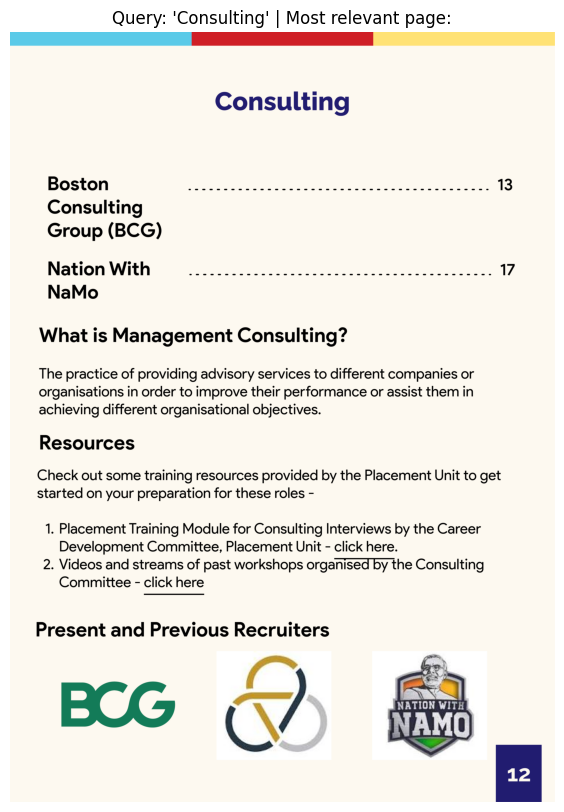

In [32]:
import fitz 


pdf_path = pdf_path_SI
doc = fitz.open(pdf_path)
page = doc.load_page(7) 

# Get the image of the page
img = page.get_pixmap(dpi=300)


doc.close()


img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis("off")
plt.show()

In [33]:
import torch
#defining dot_product and cosine_similarity so that we can use vector search 
def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    # Get Euclidean/L2 norm
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

In [55]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                top_n_results: int=3,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=top_n_results)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 top_n_results: int=3):
    """
    Finds relevant passages given a query and prints them out along with their scores.
    """
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  top_n_results=top_n_results)

   
    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]['page_number']}")
        print("\n")

In [56]:
query="what is consulting"
# retrieve_relevant_resources(query=query, embeddings=embeddings) 
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on (150 embeddings: 0.00008 seconds.
Score: 0.6638
Text:
Consulting 12 What is Management Consulting?The practice of providing advisory
services to different companies or organisations in order to improve their
performance or assist them in achieving different organisational objectives.
Check out some training resources provided by the Placement Unit to get started
on your preparation for these roles -T ;S Placement Training Module for
Consulting Interviews by the Career Development Committee, Placement Unit -
click hereS 5S Videos and streams of past workshops organised by the Consulting
Committee - click here Resources Present and Previous Recruiters Boston
Consulting Group (BCG) 13 Nation With NaMo 17
Page number: 7


Score: 0.3954
Text:
Boston Consulting Group 13 Introduction Interviewee - Aryan Seth (2021A7PS2221P)
Job Role - Summer Associate Number of offers made - 2 (via PPI post-Bruce
Henderson Insight | Ideathon) Selection Process Branches open 

In [37]:
model_id = "google/gemma-2b-it"
#using this according to my gpu and it's storage 
#I have downloaded the model 
print(f"model_id set to: {model_id}")

model_id set to: google/gemma-2b-it


In [67]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 4 GB


In [70]:
!nvidia-smi


Fri Jul 12 21:40:20 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   57C    P8              5W /   90W |    3872MiB /   4096MiB |     40%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [38]:
from transformers import AutoConfig
config = AutoConfig.from_pretrained(r"C:\Users\achau\Downloads\gemma2\config.json")

In [39]:
from huggingface_hub import login
login(token="_Token_")
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import AutoTokenizer, AutoModelForCausalLM




model_name_or_path = r"C:\Users\achau\Downloads\gemma2"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
model = AutoModelForCausalLM.from_pretrained(model_name_or_path)


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to C:\Users\achau\.cache\huggingface\token
Login successful


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [40]:
model
#testing if the model works 

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): GemmaRotaryEmbedding()
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm()
        (post_attention_layernorm): GemmaRMSNorm()
      )
    )
    (norm): GemmaRM

In [41]:
import torch 
#tells the numbe rof parametres of our model 
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(model)

2506172416

In [57]:
input_text = "what is consulting"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
what is consulting

Prompt (formatted):
<bos><start_of_turn>user
what is consulting<end_of_turn>
<start_of_turn>model



In [58]:
tokenizer


GemmaTokenizerFast(name_or_path='C:\Users\achau\Downloads\gemma2', vocab_size=256000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<bos>', 'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<start_of_turn>', '<end_of_turn>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<eos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<bos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	5: AddedToken("<2mass>", rstrip=False, lstrip=Fa

In [59]:
%%time

# Tokenize the input text (turn it into numbers) and send it to the GPU
input_ids = tokenizer(prompt,
                      return_tensors="pt").to("cuda")

# Generate outputs from local LLM
outputs = model.generate(**input_ids,
                             max_new_tokens=256)
print(f"Model output (tokens):\n{outputs[0]}\n")

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   5049,    603,  38032,    107,
           108,    106,   2516,    108, 180553,    603,    476,   6790,   2566,
          1570,    671,   3811,    689,   3277, 235269,   3836,    685,    573,
         37410, 235269,   6572,  17163, 235269,   8111, 235269,    689,   3545,
           577,   2550,   4591,    575,    476,   3724,   2725,    689,   2713,
        235265,  85361,    798,    614,  30186,    604,   4282,   9841, 235269,
          3359, 235292,    109, 235287,   5231,  90042,   7945,  66058,  55762,
           578,  32372,   1497, 235290,   7617,  14869,    604,  12065, 235269,
         12140, 235269,    689,   9278, 235265,    108, 235287,   5231,   8387,
          4815,  66058,  16509, 235269,  57949, 235269,    578,  29088,   7340,
           577,   7914,   3724,   9082, 235265,    108, 235287,   5231,  14103,
          4084,  66058, 104534,    578,  49219,   2567,   4552,    689,  10353,
           577,  

In [60]:
# Decode the output tokens to text
#Judging by the output the llm gives answer on the data it is trained on and not the actual pdf
#I have to fix this ,but I don't have the time as I am going on a vacation 
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
what is consulting<end_of_turn>
<start_of_turn>model
Consulting is a professional service where an individual or company, known as the consultant, provides guidance, advice, or services to another party in a specific field or area. Consultants can be hired for various purposes, including:

* **Strategic planning:** Developing and implementing long-term strategies for businesses, organizations, or individuals.
* **Project management:** Planning, executing, and controlling projects to achieve specific goals.
* **Business analysis:** Identifying and analyzing business problems or opportunities to develop solutions.
* **Training and development:** Providing training and development programs to enhance skills and knowledge.
* **Marketing and advertising:** Developing and implementing marketing and advertising strategies to achieve business objectives.
* **Financial consulting:** Providing financial advice and guidance, including financia